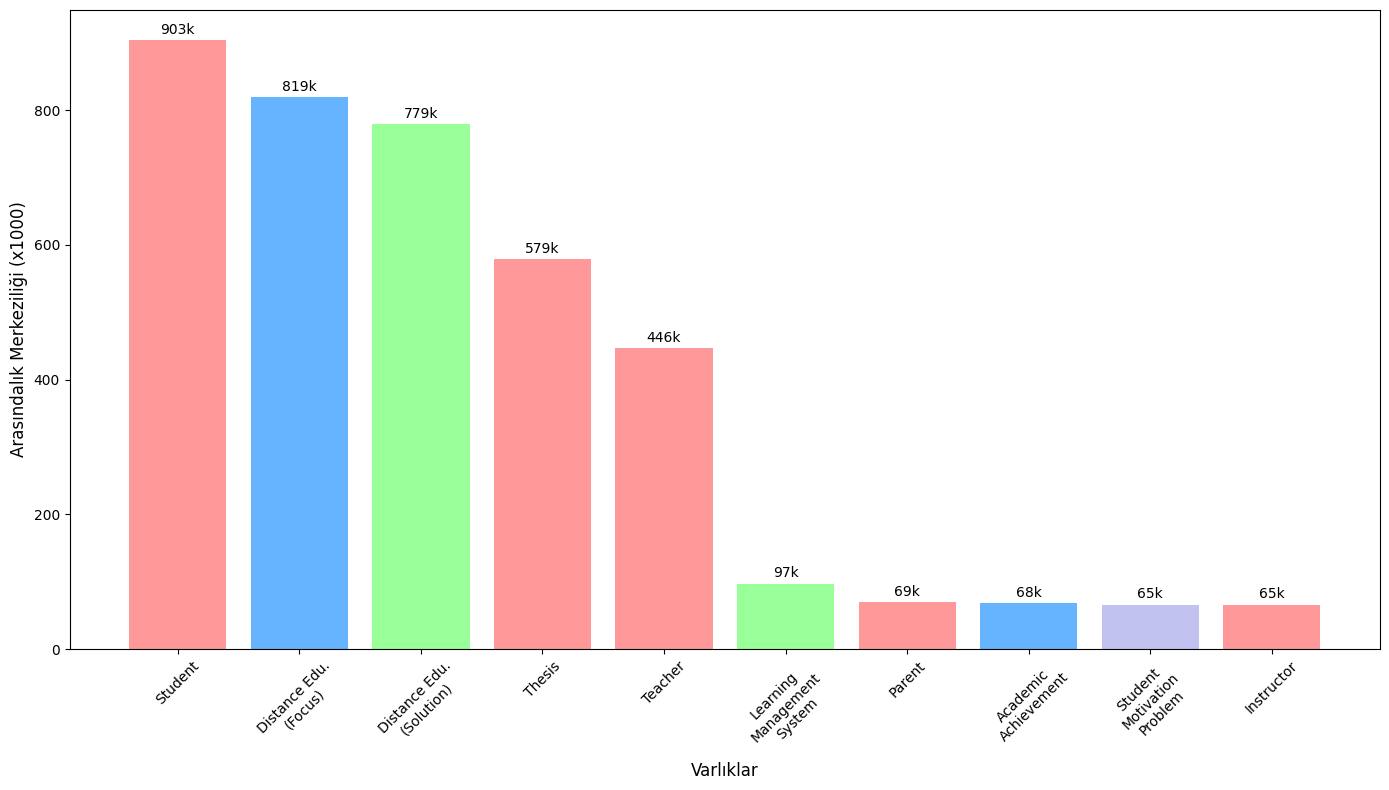

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Arasındalık merkeziliği verilerini hazırla
entities = ['student', 'distance education (FOCUS)', 'distance education (SOLUTION)', 
           'thesis', 'teacher', 'learning management system', 'parent', 
           'academic achievement', 'student motivation problem', 'instructor']
           
betweenness = [903656.31, 819585.61, 779712.10, 579231.40, 446668.20, 
               97068.87, 69681.76, 68151.64, 65957.85, 65745.01]

# Daha okunabilir değerler için arasındalık değerlerini 1000'e böl
betweenness_scaled = [b/1000 for b in betweenness]

# Entity isimlerini kısalt
entity_labels = ['Student', 'Distance Edu.\n(Focus)', 'Distance Edu.\n(Solution)', 
                'Thesis', 'Teacher', 'Learning\nManagement\nSystem', 'Parent', 
                'Academic\nAchievement', 'Student\nMotivation\nProblem', 'Instructor']

# Entity türlerine göre renklendirme
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ff9999', '#ff9999', 
         '#99ff99', '#ff9999', '#66b3ff', '#c2c2f0', '#ff9999']

plt.figure(figsize=(14, 8))
bars = plt.bar(entity_labels, betweenness_scaled, color=colors)

# Değerleri bar üzerinde göster
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(height)}k', ha='center', va='bottom', fontsize=10)

plt.xlabel('Varlıklar', fontsize=12)
plt.ylabel('Arasındalık Merkeziliği (x1000)', fontsize=12)
# plt.title('Şekil 3: Uzaktan Eğitim Yüksek Lisans Tezleri Bilgi Ağında\nEn Yüksek Arasındalık Merkeziliğine Sahip İlk 10 Varlık', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('betweenness_centrality.png', dpi=300, bbox_inches='tight')
plt.show()

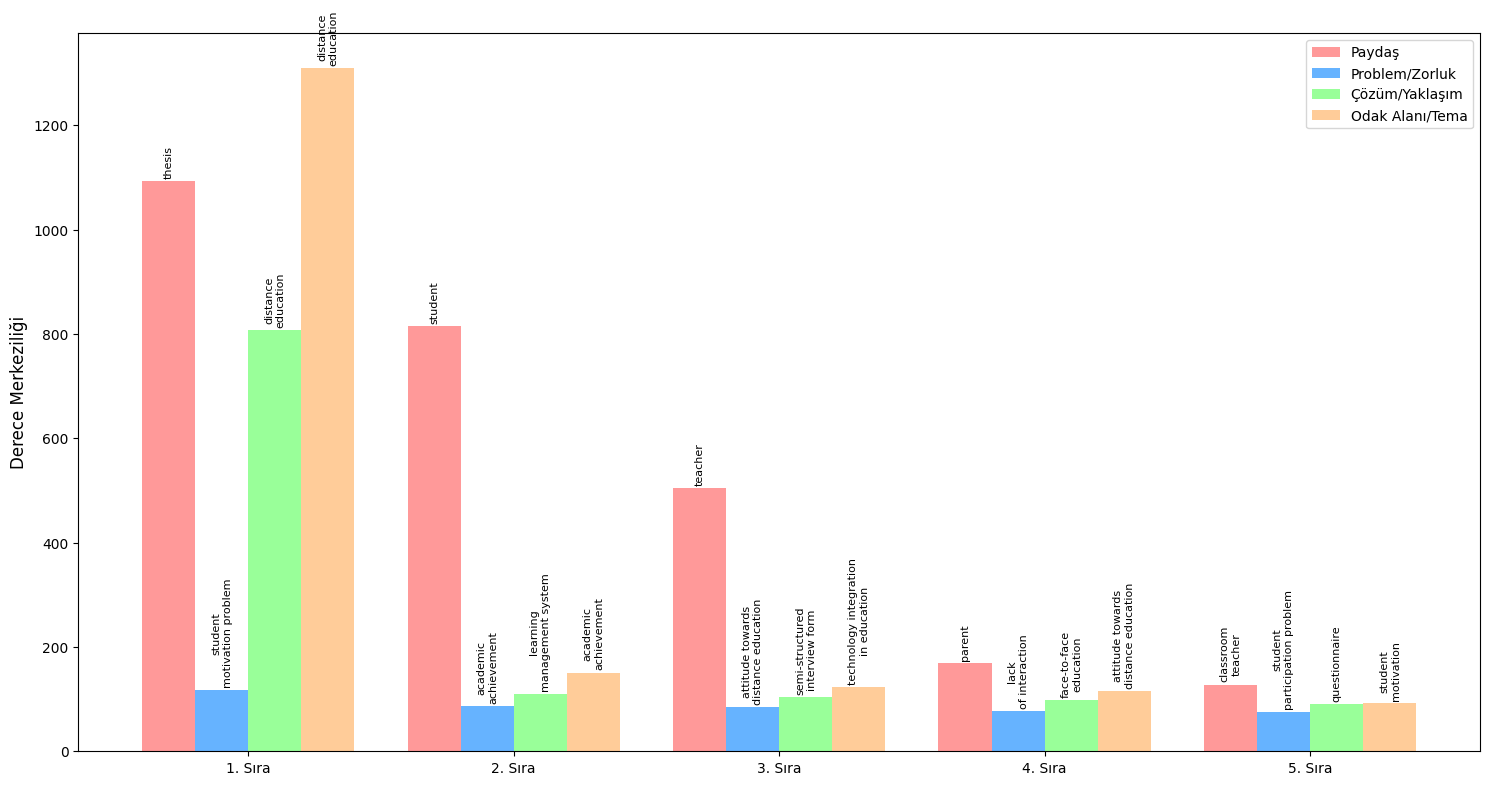

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Veri hazırlığı
categories = ['Paydaş', 'Problem/Zorluk', 'Çözüm/Yaklaşım', 'Odak Alanı/Tema']
stakeholders = ['thesis', 'student', 'teacher', 'parent', 'classroom teacher']
problems = ['student motivation problem', 'academic achievement', 'attitude towards distance education', 
           'lack of interaction', 'student participation problem']
solutions = ['distance education', 'learning management system', 'semi-structured interview form', 
            'face-to-face education', 'questionnaire']
themes = ['distance education', 'academic achievement', 'technology integration in education', 
         'attitude towards distance education', 'student motivation']

# Her bir kategori için en yüksek 5 varlığın derece değerleri
stakeholder_degrees = [1093, 816, 505, 169, 128]
problem_degrees = [117, 86, 84, 77, 76]
solution_degrees = [808, 110, 104, 99, 90]
theme_degrees = [1311, 151, 124, 116, 92]

# Grafik için x pozisyonları
x = np.arange(5)
width = 0.2

# Grafik oluşturma
fig, ax = plt.subplots(figsize=(15, 8))

# Her kategori için bar ekleme
rects1 = ax.bar(x - width*1.5, stakeholder_degrees, width, label='Paydaş', color='#ff9999')
rects2 = ax.bar(x - width/2, problem_degrees, width, label='Problem/Zorluk', color='#66b3ff')
rects3 = ax.bar(x + width/2, solution_degrees, width, label='Çözüm/Yaklaşım', color='#99ff99')
rects4 = ax.bar(x + width*1.5, theme_degrees, width, label='Odak Alanı/Tema', color='#ffcc99')

# Grafik düzenleme
ax.set_ylabel('Derece Merkeziliği', fontsize=12)
# ax.set_title('Şekil 4: Uzaktan Eğitim Yüksek Lisans Tezleri Bilgi Ağında\nVarlık Türlerine Göre En Yüksek Derece Merkeziliğine Sahip Kavramlar', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(['1. Sıra', '2. Sıra', '3. Sıra', '4. Sıra', '5. Sıra'])
ax.legend()

# Her barın üzerine varlık isimlerini ekle (kısaltılmış)
def add_labels(rects, names):
    for i, (rect, name) in enumerate(zip(rects, names)):
        # İsimlerin kısaltılması (uzun isimleri satır sonunda böl)
        if len(name) > 15:
            split_name = name.split(' ')
            if len(split_name) > 1:
                name = '\n'.join([' '.join(split_name[:len(split_name)//2]), ' '.join(split_name[len(split_name)//2:])])
            else:
                name = name[:12] + '...'
                
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height + 5,
                name, ha='center', va='bottom', fontsize=8, rotation=90)

add_labels(rects1, stakeholders)
add_labels(rects2, problems)
add_labels(rects3, solutions)
add_labels(rects4, themes)

plt.tight_layout()
plt.savefig('entity_type_centrality.png', dpi=300, bbox_inches='tight')
plt.show()